<a href="https://colab.research.google.com/github/HadassaMB/HadassaMB/blob/main/Copie_de_ResShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **ResShift: Efficient Diffusion Model for Image Super-resolution by Residual Shifting**

[Zongsheng Yue](https://zsyoaoa.github.io/), [Jianyi Wang](https://iceclear.github.io/), and [Chen Change Loy](https://www.mmlab-ntu.com/person/ccloy/)

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2307.12348) [![GitHub Stars](https://img.shields.io/github/stars/zsyOAOA/ResShift?affiliations=OWNER&color=green&style=social)](https://github.com/zsyOAOA/ResShift) ![visitors](https://visitor-badge.laobi.icu/badge?page_id=zsyOAOA/ResShift)



## **Setup Conda Environment**
Before start, make sure that you choose
* Hardware Accelerator = GPU (in the Runtime menu -> Change runtime type)

In [1]:
from google.colab import drive

drive.mount('/content/drive')

# TODO: Enter the path in your Drive of the assignment.
# e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Work/ResShift'

assert FOLDERNAME is not None, "[!] Enter the foldername."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/My\ Drive
%cd $FOLDERNAME

/content/drive/My Drive
/content/drive/My Drive/Work/ResShift


In [16]:
!pip install virtualenv
!virtualenv /content/drive/MyDrive/Work/ResShift-env

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 32.6 MB/s eta 0:00:00
created virtual environment CPython3.11.11.final.0-64 in 19814ms
  creator CPython3Posix(dest=/content/drive/MyDrive/Work/ResShift-env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: condacolab==0.1.10, pip==25.0.1, setuptools==75.8.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [3]:
!source /content/drive/MyDrive/Work/ResShift-env/bin/activate

In [18]:
!find / -name condacolab.py

find: ‘/proc/69/task/69/net’: Invalid argument
find: ‘/proc/69/net’: Invalid argument
find: ‘/proc/636/task/636/net’: Invalid argument
find: ‘/proc/636/net’: Invalid argument
^C


In [8]:
import sys, os
virtual_env_path = '/content/drive/MyDrive/Work/ResShift-env/lib/python3.11/site-packages'
sys.path.insert(0, virtual_env_path)
# Install Miniconda3
pip1 = '/content/drive/MyDrive/Work/ResShift-env/bin/pip3'
!$pip1 install condacolab
#--no-cache-dir --upgrade --force-reinstall
virtual_env_path = '/content/drive/MyDrive/Work/ResShift-env/lib/python3.11/site-packages'
sys.path.insert(0, virtual_env_path)
import condacolab
condacolab.install_miniconda(prefix='/content/drive/MyDrive/Work/ResShift-env', run_checks=False)
print('The Miniconda has been installed...')

Miniconda is subject to terms of service: https://legal.anaconda.com/policies/en/#terms-of-service


⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh...
📦 Installing...


AssertionError: 💥💔💥 The installation failed! Logs are available at `/content/condacolab_install.log`.

In [9]:
import os
os.chdir("/content")
CODE_DIR = "ResShift"
print("Done...")

Done...


## **Clone Repository**

In [4]:
# prompt: create environment conda using python 311

import condacolab
import os

condacolab.check()
condacolab.install()
!conda create -n reshift_env python=3.11 -y
!conda init bash
!conda activate reshift_env


✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!
/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Channels:
 - defaults
Platform: linux-64
Solving environment: \ | done

## Package Plan ##

  environment location: /usr/local/envs/reshift_env

  added / updated specs:
    - python=3.11


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main 
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu 
  bzip2              pkgs/main/linux-64::bzip2-1.0.8-h5eee18b_6 
  ca-certificates    pkgs/main/linux-64::ca-certificates-2024.12.31-h06a4308_0 
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.40-h12ee557_0 
  libffi             pkgs/main/linux-64::libffi-3.4.4-h6a678d5_1 
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-11.2.0-h1234567_1 
  libgomp            pkgs/main/linux-64::libgomp-11.2.0-h1234567_1 
  libstdcxx-ng       pkgs/main/linux-64::libstdcxx-ng-11

In [10]:
# Clone Repository
import shutil
from pathlib import Path
if Path(CODE_DIR).exists():
  shutil.rmtree(CODE_DIR)

!git clone https://github.com/zsyOAOA/ResShift.git $CODE_DIR
os.chdir(f"./{CODE_DIR}")
print("Done...")

Cloning into 'ResShift'...
remote: Enumerating objects: 904, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 904 (delta 106), reused 95 (delta 93), pack-reused 782 (from 1)
Receiving objects: 100% (904/904), 72.39 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (226/226), done.
Done...


In [11]:
"""
Managing environments Anaconda:
https://docs.conda.io/projects/conda/en/4.6.0/user-guide/tasks/manage-environments.html
"""
# Viewing the list of your environments
# !conda info --envs
# Updating the environment, this step takes about 20 mins, please be patient.
# conda env update -n base -f /content/ResShift/environment.yml
!$pip1 install -r requirements.txt
print("The environemnt has beed updated...")

The environemnt has beed updated...


## **Inference**

In [12]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Zoomed LR', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('ResShift', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  if img.ndim > 3:
    img = img[:, :, :3]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [13]:
import os
# os.chdir("ResShift")
print(os.getcwd())

/content/ResShift


In [17]:
#  Real-World Image super-resolution
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task realsr
  --scale 4
  --version 3
  --chop_size 512 (GPU memory requirements: 512 --> 20GB, 256 --> 11GB )
"""
python1 = '/content/drive/MyDrive/Work/ResShift-env/bin/python'
!$python1 inference_resshift.py -i testdata/RealSet65/dog2.png -o results/RealSet65 --task realsr --scale 4 --version v3

im_lq = imread("testdata/RealSet65/dog2.png")
im_hq = imread("results/RealSet65/dog2.png")
display(im_lq, im_hq)


Downloading: "https://github.com/zsyOAOA/ResShift/releases/download/v2.0/resshift_realsrx4_s4_v3.pth" to /content/ResShift/weights/resshift_realsrx4_s4_v3.pth

100% 456M/456M [00:07<00:00, 64.6MB/s]
Downloading: "https://github.com/zsyOAOA/ResShift/releases/download/v2.0/autoencoder_vq_f4.pth" to /content/ResShift/weights/autoencoder_vq_f4.pth

100% 211M/211M [00:03<00:00, 55.6MB/s]
Chopping size/stride: 512/448
Building the diffusion model with length: 4...
/content/drive/MyDrive/Work/ResShift-env/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/content/drive/MyDrive/Work/ResShift-env/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/

AttributeError: 'NoneType' object has no attribute 'ndim'

In [ ]:
#  Real-World Image super-resolution: Failed example
"""
The dataset RealSet65 contains several hard real-world examples, current SR methods almost cannot successfully deal with them.
Image name: camel.jpeg; im_lq1.png; im_lq2.png; urban1.jpeg; dog1.jpeg
"""

!python inference_resshift.py -i testdata/RealSet65/camel.jpeg  -o results/RealSet65/ --task realsr --scale 4 --version v3 --chop_size 256

im_lq = imread("testdata/RealSet65/camel.jpeg")
im_hq = imread("results/RealSet65/camel.png")
display(im_lq, im_hq)

In [ ]:
#  Bicubic (resize from matlab) Image super-resolution
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task bicsr
  --scale 4
  --chop_size 256 (GPU memory requirements: 512 --> 20GB, 256 --> 11GB )
"""
!python inference_resshift.py -i testdata/Bicubicx4/lq_matlab/ILSVRC2012_val_00000067.png  -o results/Bicubicx4/ --task bicsr --chop_size 256 --scale 4

im_lq = imread("testdata/Bicubicx4/lq_matlab/ILSVRC2012_val_00000067.png")
im_hq = imread("results/Bicubicx4/ILSVRC2012_val_00000067.png")
display(im_lq, im_hq)

In [ ]:
#  Natural Image inpainting
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task inpaint_imagenet
  --scale 1
"""
!python inference_resshift.py -i testdata/inpainting/imagenet/lq/ILSVRC2012_val_00005814.JPEG --mask_path testdata/inpainting/imagenet/mask/ILSVRC2012_val_00005814.JPEG  -o results/inpaint_imagenet --task inpaint_imagenet --scale 1

im_lq = imread("testdata/inpainting/imagenet/lq_mark/ILSVRC2012_val_00005814_mark.png")
im_hq = imread("results/inpaint_imagenet/ILSVRC2012_val_00005814.png")
display(im_lq, im_hq)

In [ ]:
#  Face Image inpainting
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task inpaint_face
  --scale 1
"""
!python inference_resshift.py -i testdata/inpainting/face/lq/269.png --mask_path testdata/inpainting/face/mask/269.png  -o results/inpaint_face --task inpaint_face --scale 1

im_lq = imread("testdata/inpainting/face/lq_mark/269_mark.png")
im_hq = imread("results/inpaint_face/269.png")
display(im_lq, im_hq)

In [ ]:
#  Blind Face Restoration
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task faceir
  --scale 1
"""
!python inference_resshift.py -i testdata/faceir/cropped_faces/lq/0444.png  -o results/faceir --task faceir --scale 1

im_lq = imread("testdata/faceir/cropped_faces/lq/0444.png")
im_hq = imread("results/faceir/0444.png")
display(im_lq, im_hq)

In [22]:
def infer_tests(im1):
  name_image = im1.split('/')[-1]
  im2 = f"results/AerialImages/{name_image}"
  !python inference_resshift.py -i $im1 -o "results/AerialImages" --task realsr --scale 4 --version v3 --chop_size 256
  im_lq = imread(im1)
  print(im2)
  im_hq = imread(im2)
  display(im_lq, im_hq)

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Chopping size/stride: 512/448
Building the diffusion model with length: 4...
/usr/local/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Loading Diffusion model from weights/resshift_realsrx4_s4_v3.pth...
building MemoryEfficientAttnBlock with 512 in_channels...
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
building MemoryEfficientAttnBlock with 512 in_channel

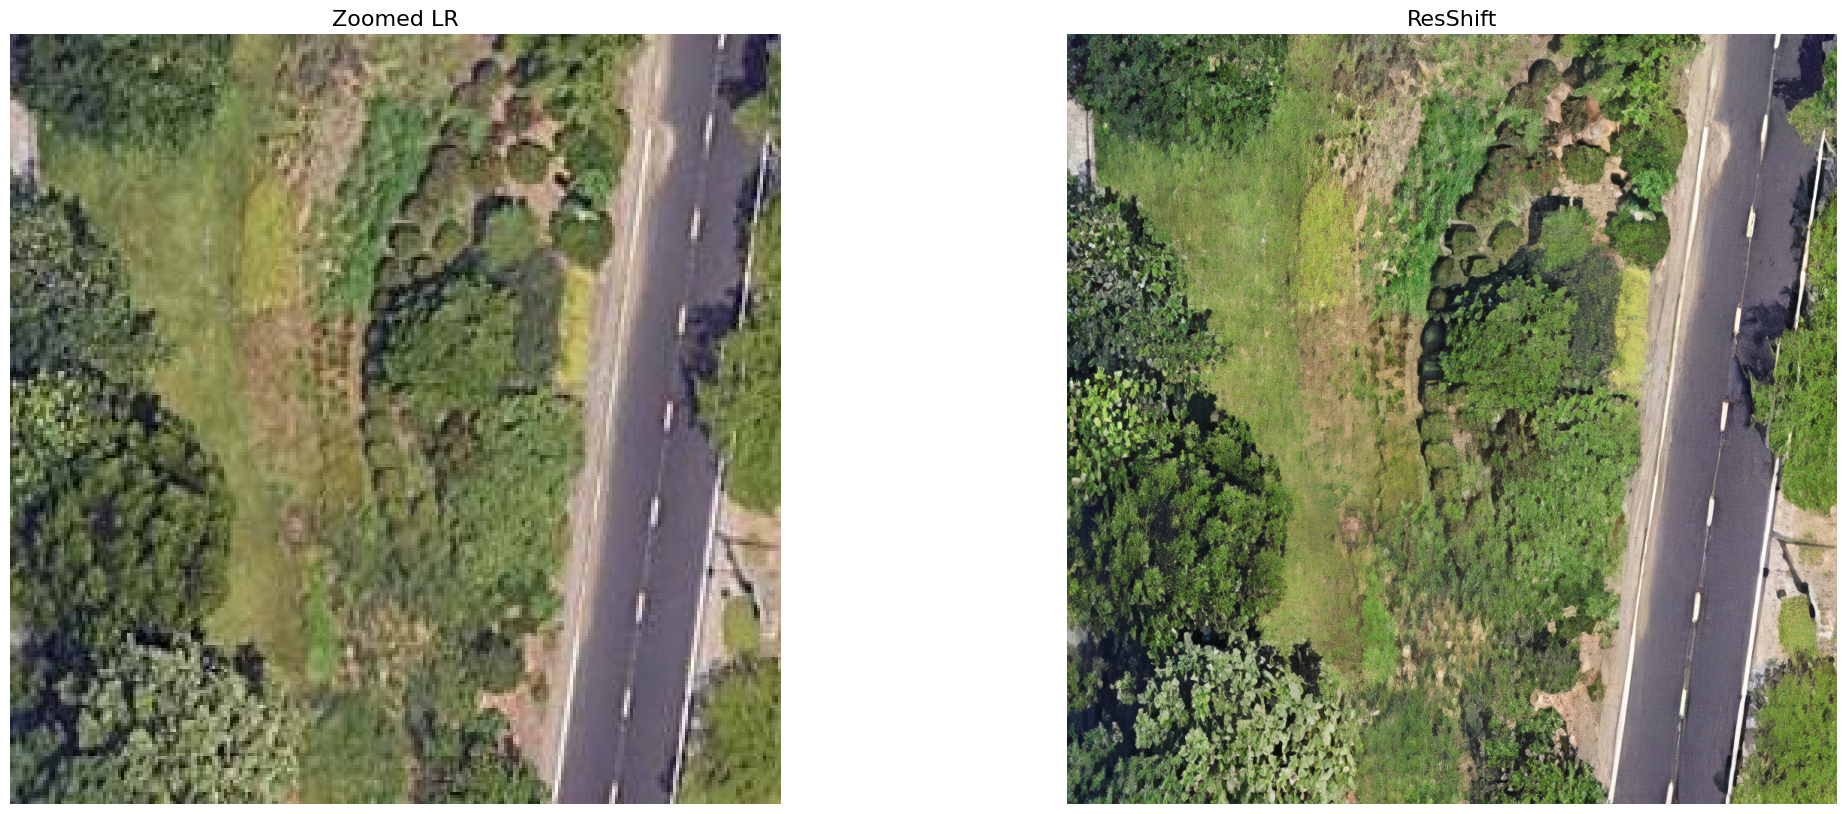

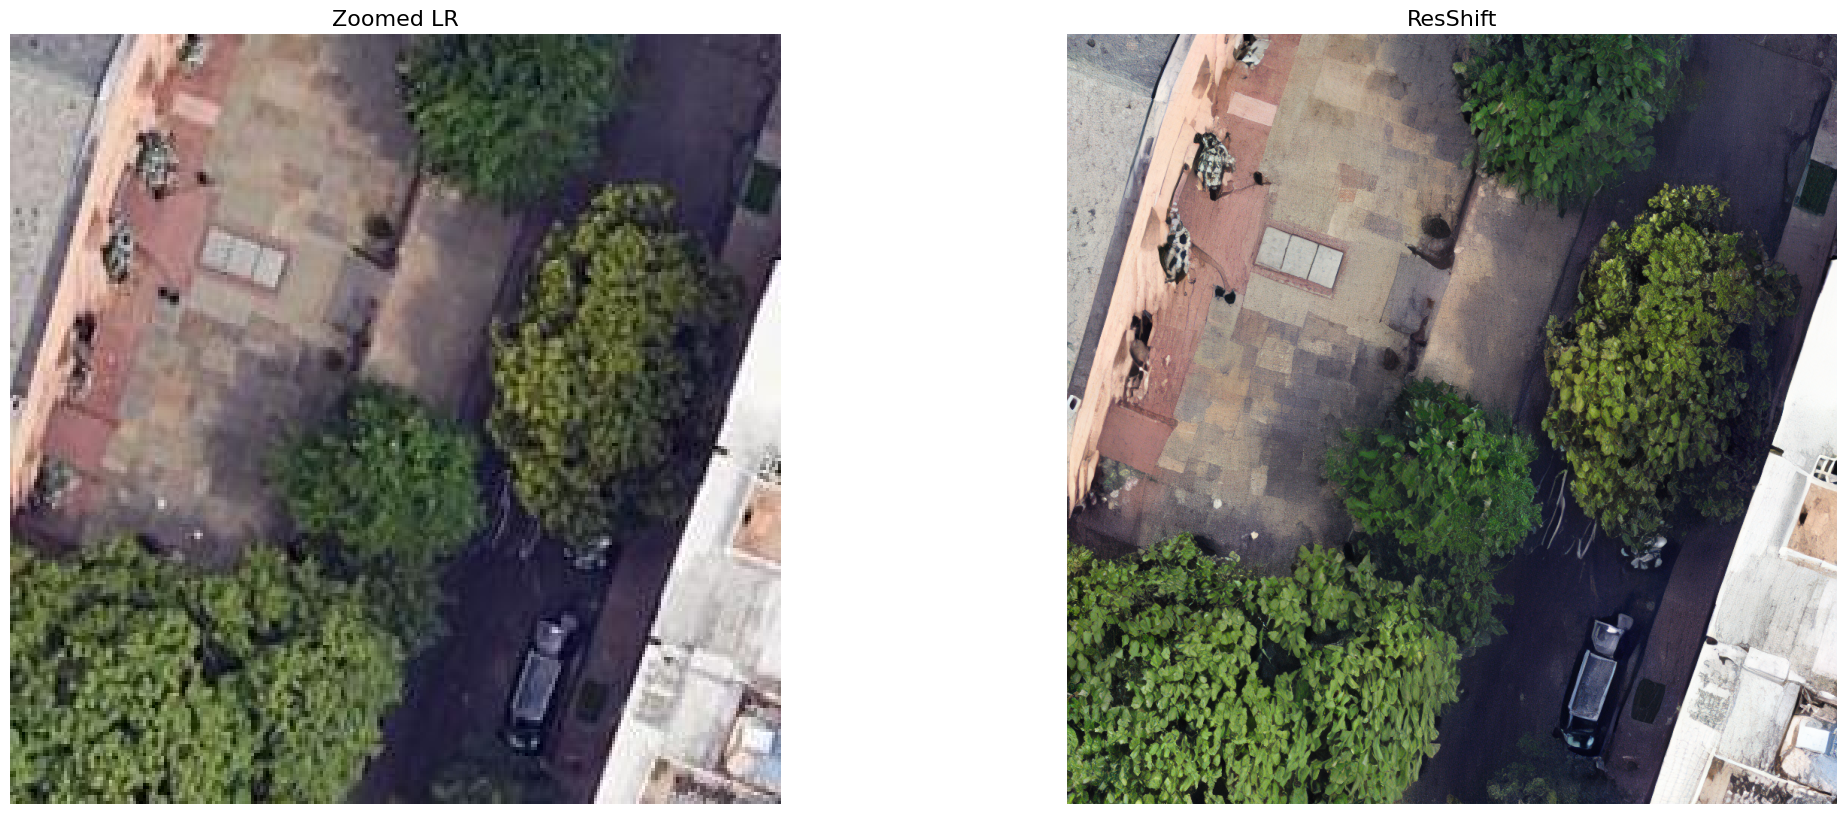

In [18]:
infer_tests('testdata/AerialImages/trees_road.png')
infer_tests('testdata/AerialImages/trees_street.png')

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Chopping size/stride: 256/224
Building the diffusion model with length: 4...
/usr/local/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Loading Diffusion model from weights/resshift_realsrx4_s4_v3.pth...
building MemoryEfficientAttnBlock with 512 in_channels...
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
building MemoryEfficientAttnBlock with 512 in_channel

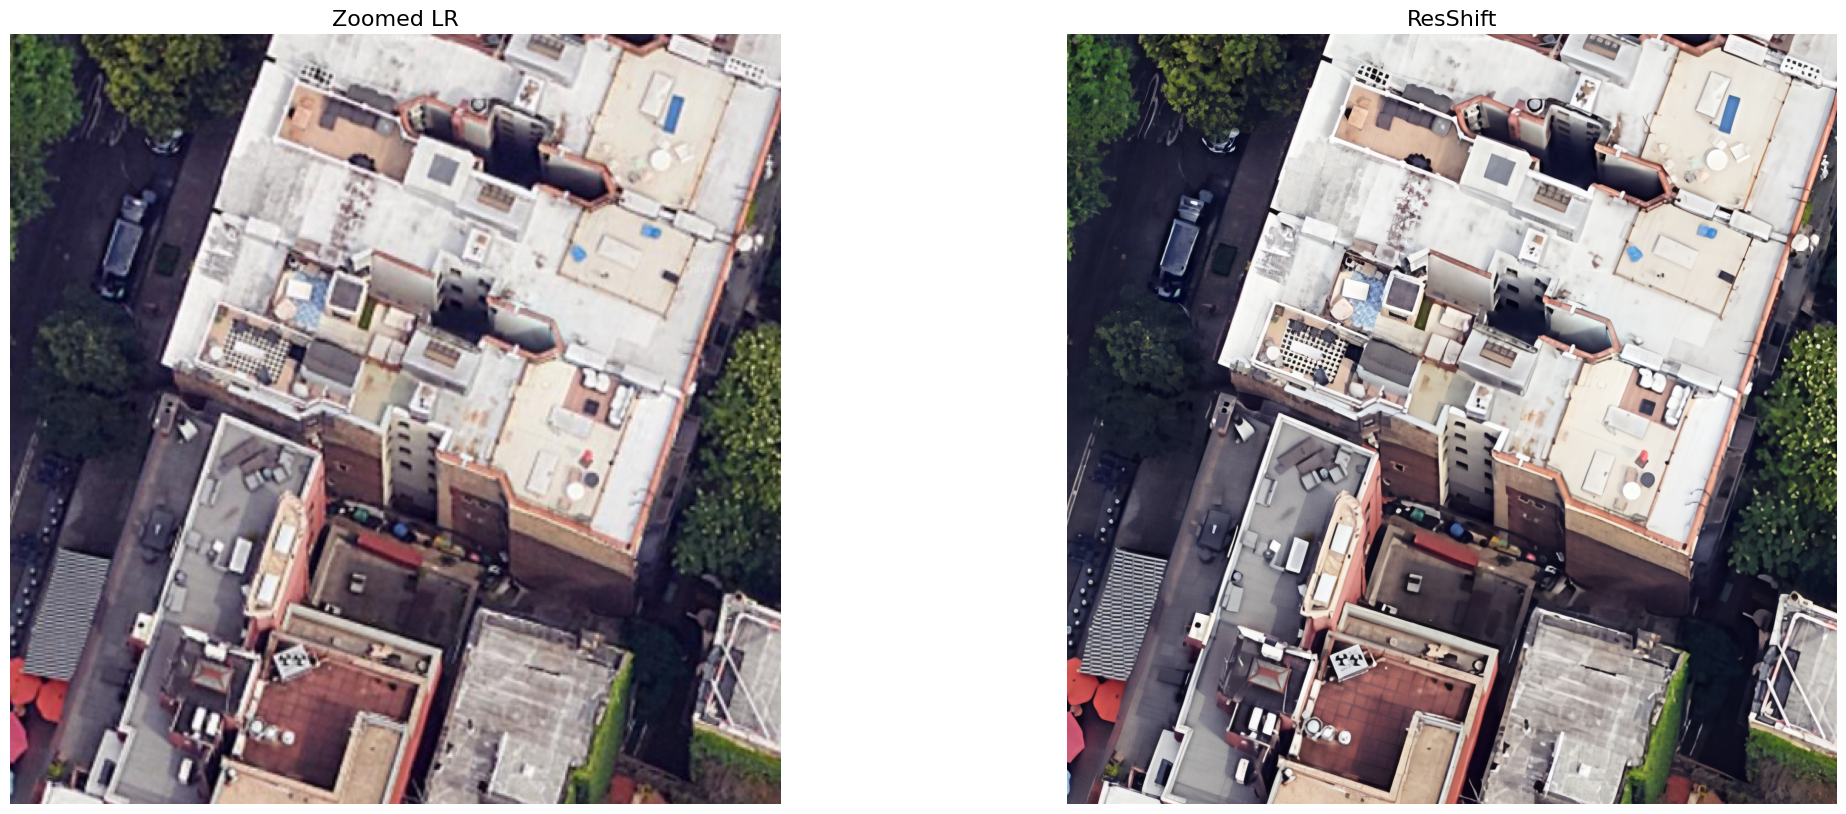

In [23]:
infer_tests('testdata/AerialImages/buildings_resized.png')
